# Florida UO2 ThO2 Mixture Assignment: 16OCt

In [1]:
%matplotlib inline
import openmc

## Define Materials

In [2]:
# Establish Thorium Oxide Fuel Mixture Component material (unused)
uo2 = openmc.Material(1,'uo2')
print(uo2)

Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [3]:
# add nuclides to uo2
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)

In [4]:
# set UO2 Density (based on TRISO Density of 10.5 g/cm^3)
uo2.set_density('g/cm3', 10.5)

In [5]:
# Establish Thorium Oxide Fuel Mixture Component material (unused)
tho2 = openmc.Material(2,'tho2')
print(tho2)

Material
	ID             =	2
	Name           =	tho2
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [6]:
fuel = openmc.Material(3, 'fuel');
#The below ratios were calculated assuming 95%LEU-5%Th Oxide Fuel.
fuel.add_nuclide('Th232', 0.04734, 'ao')
fuel.add_nuclide('U235', 0.04821, 'ao') #5% U-235 enrichment
fuel.add_nuclide('U238', 0.90445, 'ao')
fuel.add_element('O', 2.0)
fuel.set_density('g/cm3', 10.46) # BAsed on assumption of fuel density within TRISO
print(fuel)

Material
	ID             =	3
	Name           =	fuel
	Temperature    =	None
	Density        =	10.46 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	Th232          =	0.04734      [ao]
	U235           =	0.04821      [ao]
	U238           =	0.90445      [ao]
	O16            =	1.999242     [ao]
	O17            =	0.000758     [ao]



In [7]:
# add nuclides to tho2
tho2.add_nuclide('Th232', 0.9998)
tho2.add_nuclide('Th230', 0.0002)
tho2.add_nuclide('O16', 2.0)

In [8]:
# set ThO2 Density (based on TRISO UO2 Density of 10.5 g/cm^3, assumption that density is distributed)
tho2.set_density('g/cm3', 9.7)

In [9]:
# Establish Graphite Moderator material
graph = openmc.Material(4,'graph')
print(graph)

Material
	ID             =	4
	Name           =	graph
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [10]:
# add nuclides to graph
graph.add_element('C', 1.00)

In [11]:
# Establish Helium Coolant material
hel_Cool = openmc.Material(5,'hel_Cool')
print(hel_Cool)

Material
	ID             =	5
	Name           =	hel_Cool
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [12]:
# add nuclides to hel_Cool
hel_Cool.add_nuclide('He3', 0.000002)
hel_Cool.add_nuclide('He4', 0.999998)

In [13]:
materials = openmc.Materials([uo2, tho2, fuel, graph, hel_Cool])

In [14]:
materials = openmc.Materials()
materials.append(uo2)
materials += [tho2, fuel, graph, hel_Cool]
isinstance(materials,list)

True

## Export Materials as XML

In [15]:
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.5" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material depletable="true" id="2" name="tho2">
    <density units="g/cm3" value="9.7" />
    <nuclide ao="0.9998" name="Th232" />
    <nuclide ao="0.0002" name="Th230" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material depletable="true" id="3" name="fuel">
    <density units="g/cm3" value="10.46" />
    <nuclide ao="0.04734" name="Th232" />
    <nuclide ao="0.04821" name="U235" />
    <nuclide ao="0.90445" name="U238" />
    <nuclide ao="1.999242" name="O16" />
    <nuclide ao="0.000758" name="O17" />
  </material>
  <material id="4" name="graph">
    <density units="sum" />
    <nuclide ao="1.0" name="C0" />
  </material>
  <material id="5" name="hel_Cool">
    <density units="sum" />
    <nuclide ao="2e

## Define Geometry

In [16]:
sphere = openmc.Sphere(r=1.0)

In [17]:
inside_sphere = -sphere
outside_sphere = +sphere

In [18]:
print((0,0,0) in inside_sphere, (0,0,2) in inside_sphere)
print((0,0,0) in outside_sphere, (0,0,2) in outside_sphere)

True False
False True


In [19]:
cell = openmc.Cell()
cell.region = inside_sphere

In [20]:
cell.fill = hel_Cool

## Create Universe

In [21]:
universe = openmc.Universe()
universe.add_cell(cell)

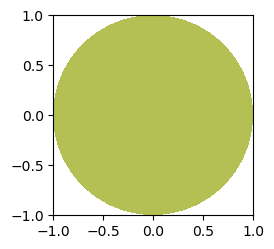

In [22]:
universe.plot(width=(2.0, 2.0))

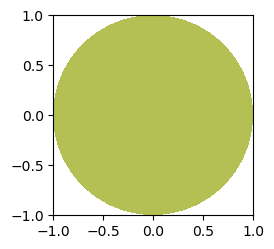

In [23]:
universe.plot(width=(2.0, 2.0), basis = 'xz')

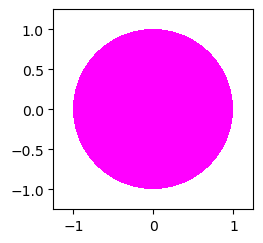

In [24]:
universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})

## Define Bounding Geometry

In [25]:
fuel_outer_rad = openmc.Sphere(r=0.4)
clad_inner_rad = fuel_outer_rad
clad_outer_rad = openmc.Sphere(r=0.5)

In [26]:
fuel_region = -fuel_outer_rad
graph_region = +clad_inner_rad & -clad_outer_rad

In [27]:
fuel_Geom = openmc.Cell(name='fuel_Geom')
fuel.fill = fuel
fuel.region = fuel_region

graph_Geom = openmc.Cell(name='graph_Geom')
graph_Geom.fill = graph
graph_Geom.region = graph_region

In [28]:
pitch = 2.0

box = openmc.rectangular_prism(width=pitch, height=pitch, boundary_type='reflective')
type(box)

openmc.region.Intersection

In [29]:
hel_Cool_region = box & +clad_outer_rad

moderator = openmc.Cell(name='moderator')
moderator.fill = hel_Cool
moderator.region = hel_Cool_region

In [30]:
root_universe = openmc.Universe(cells=(fuel_Geom, graph_Geom, moderator))

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="2" material="void" name="fuel_Geom" universe="2" />
  <cell id="3" material="4" name="graph_Geom" region="2 -3" universe="2" />
  <cell id="4" material="5" name="moderator" region="4 -5 6 -7 3" universe="2" />
  <surface coeffs="0.0 0.0 0.0 0.4" id="2" type="sphere" />
  <surface coeffs="0.0 0.0 0.0 0.5" id="3" type="sphere" />
  <surface boundary="reflective" coeffs="-1.0" id="4" name="minimum x" type="x-plane" />
  <surface boundary="reflective" coeffs="1.0" id="5" name="maximum x" type="x-plane" />
  <surface boundary="reflective" coeffs="-1.0" id="6" name="minimum y" type="y-plane" />
  <surface boundary="reflective" coeffs="1.0" id="7" name="maximum y" type="y-plane" />
</geometry>


## Cross Sections

In [31]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
    ...
  <library materials="Cf253" path="wmp/098253.h5" type="wmp" />
  <library materials="Cf254" path="wmp/098254.h5" type="wmp" />
  <library materials="Es251" path="wmp/099251.h5" type="wmp" />
  <library materials="Es252" path="wmp/099252.h5" type="wmp" />
  <library materials="Es253" path="wmp/099253.h5" type="wmp" />
  <library materials="Es254" path="wmp/099254.h5" type="wmp" />
  <library materials="

## Source

In [32]:
# create a point source
point = openmc.stats.Point((0,0,0))
source = openmc.Source(space=point)


In [33]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [34]:
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


In [35]:
## Tallies

In [36]:
cell_filter = openmc.CellFilter(fuel_Geom)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

In [37]:
tally.nuclides = ['U235']
tally.scores = ['total','fission','absorption','(n,gamma)']

In [38]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <filter id="1" type="cell">
    <bins>2</bins>
  </filter>
  <tally id="1">
    <filters>1</filters>
    <nuclides>U235</nuclides>
    <scores>total fission absorption (n,gamma)</scores>
  </tally>
</tallies>


In [39]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

RuntimeError: OpenMC aborted unexpectedly.

In [ ]:
!cat tallies.out

## Plot Geometry

In [41]:
plot = openmc.Plot()
plot.filename = 'pinplot'
plot.width = (pitch,pitch)
plot.pixels = (200,200)
plot.color_by = 'material'
plot.colors = {fuel: 'yellow',hel_Cool: 'blue'}

In [42]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

<?xml version='1.0' encoding='utf-8'?>
<plots>
  <plot basis="xy" color_by="material" filename="pinplot" id="5" type="slice">
    <origin>0.0 0.0 0.0</origin>
    <width>2.0 2.0</width>
    <pixels>200 200</pixels>
    <color id="3" rgb="255 255 0" />
    <color id="5" rgb="0 0 255" />
  </plot>
</plots>


In [43]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

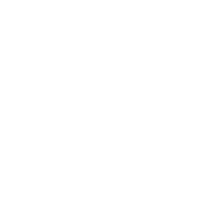

In [44]:
from IPython.display import Image
Image('pinplot.png')

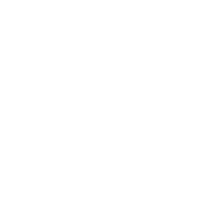

In [45]:
plot.to_ipython_image()